In [1]:
#import library
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ParameterGrid, GridSearchCV

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#load file
df= pd.read_csv('source.csv')

dataframe=df.replace({'Condition':{'Normal1':0, 'Condition1':1, 'Condition5':2}})

# print dataframe size
print("Dataframe Size",  dataframe.shape)

#convert to data frame 
X = pd.DataFrame(dataframe.iloc[:,1:])
y= pd.DataFrame(dataframe.iloc[:,0])

Dataframe Size (110, 13)


In [3]:
# create save path
path = os.getcwd()
savePath = path + '/results/'
# print(savePath)

c:\Users\royle\OneDrive\Desktop\Machine Learning\Project 1/results/


## Decision Tree 

## Full Tree

In [4]:
#define decision model
model_name = 'Injection Moulding'
model2 = dt(random_state=0)

#split data into 4/5 for training and 1/5 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]


 Iteration No. 1
Training data length: 88
Verification data length: 22
Max Depth is 7
Confusion Matrix:
 [[8 1 1]
 [2 3 1]
 [0 0 6]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.5
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy: 0.77 

Decision tree Prediction Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.75      0.50      0.60         6
           2       0.75      1.00      0.86         6

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.75        22
weighted avg       0.77      0.77      0.76        22



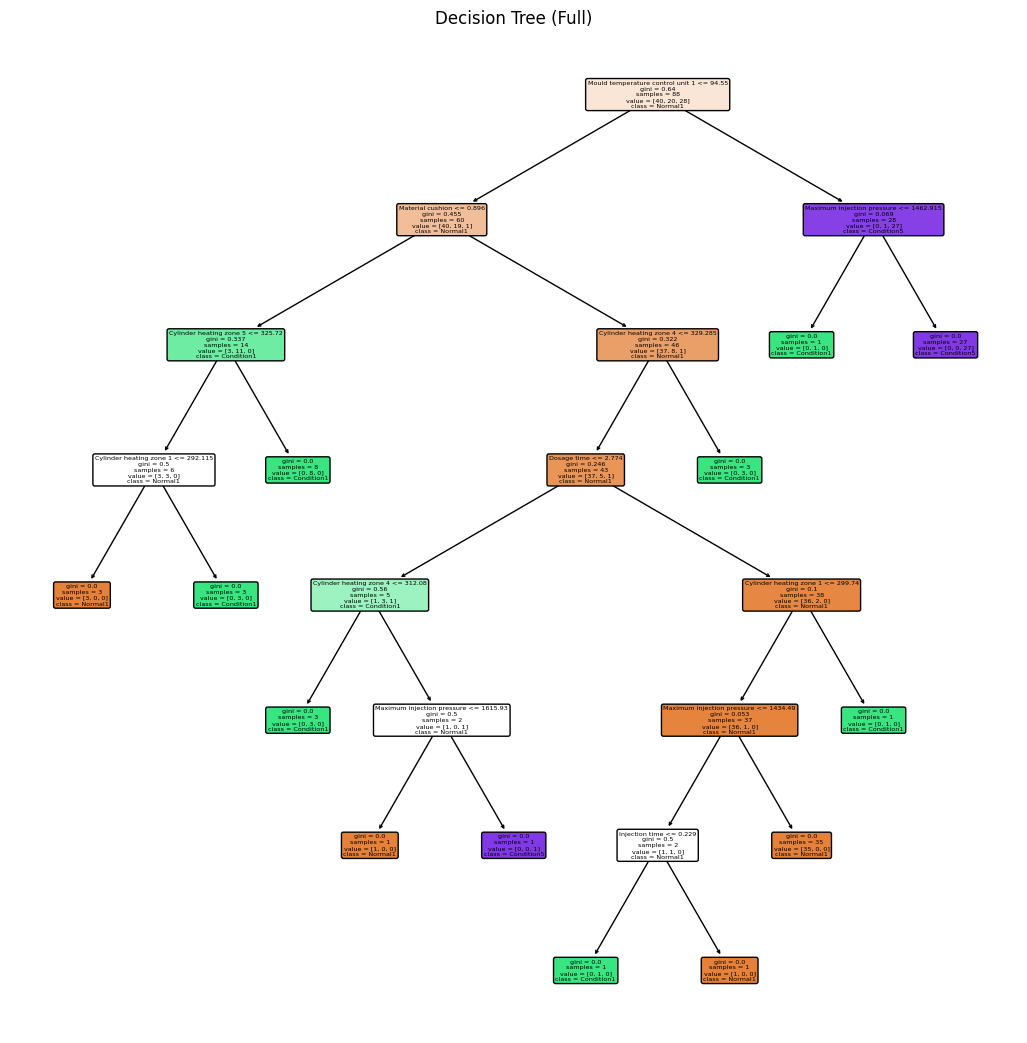

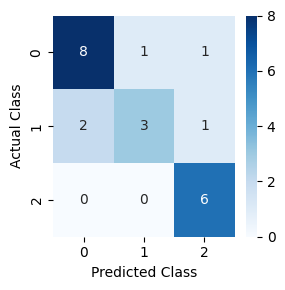


 Iteration No. 2
Training data length: 88
Verification data length: 22
Max Depth is 6
Confusion Matrix:
 [[8 2 0]
 [1 4 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy: 0.86 

Decision tree Prediction Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.67      0.80      0.73         5
           2       1.00      1.00      1.00         7

    accuracy                           0.86        22
   macro avg       0.85      0.87      0.86        22
weighted avg       0.87      0.86      0.87        22



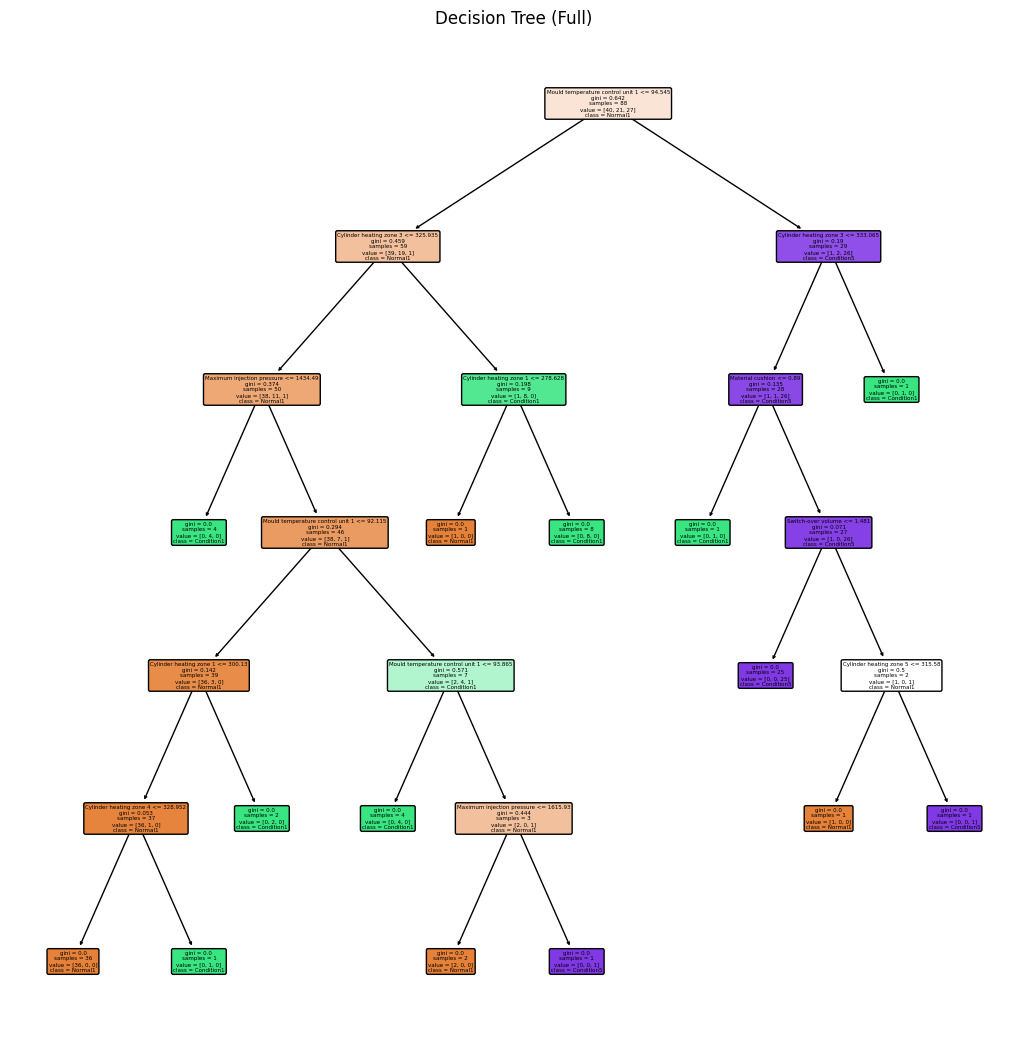

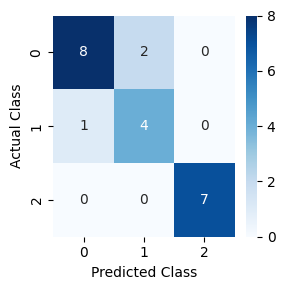


 Iteration No. 3
Training data length: 88
Verification data length: 22
Max Depth is 7
Confusion Matrix:
 [[8 2 0]
 [3 1 1]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.2
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy: 0.73 

Decision tree Prediction Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.33      0.20      0.25         5
           2       0.88      1.00      0.93         7

    accuracy                           0.73        22
   macro avg       0.65      0.67      0.65        22
weighted avg       0.68      0.73      0.70        22



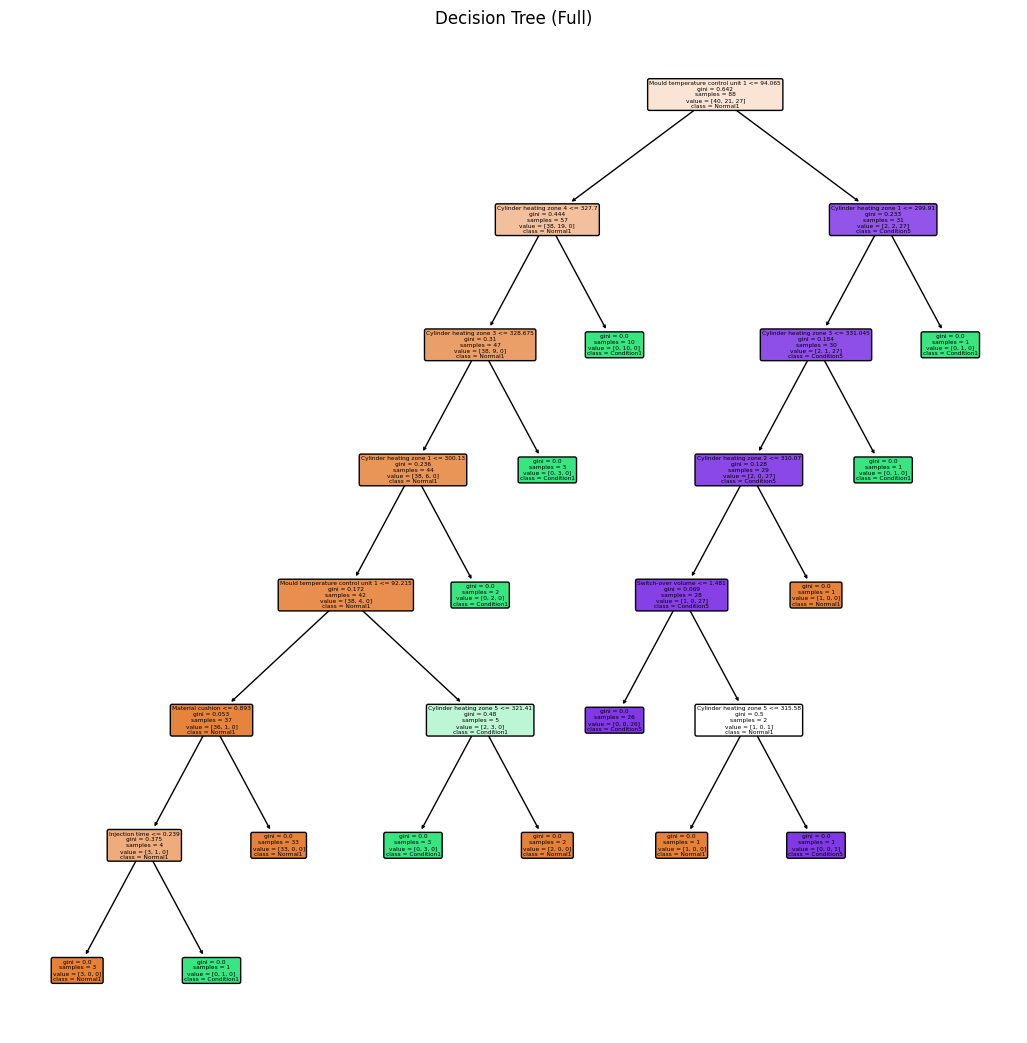

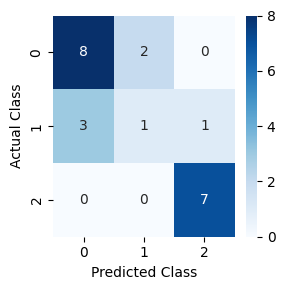


 Iteration No. 4
Training data length: 88
Verification data length: 22
Max Depth is 8
Confusion Matrix:
 [[9 1 0]
 [2 3 0]
 [1 0 6]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Overall Accuracy: 0.82 

Decision tree Prediction Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.75      0.60      0.67         5
           2       1.00      0.86      0.92         7

    accuracy                           0.82        22
   macro avg       0.83      0.79      0.80        22
weighted avg       0.83      0.82      0.82        22



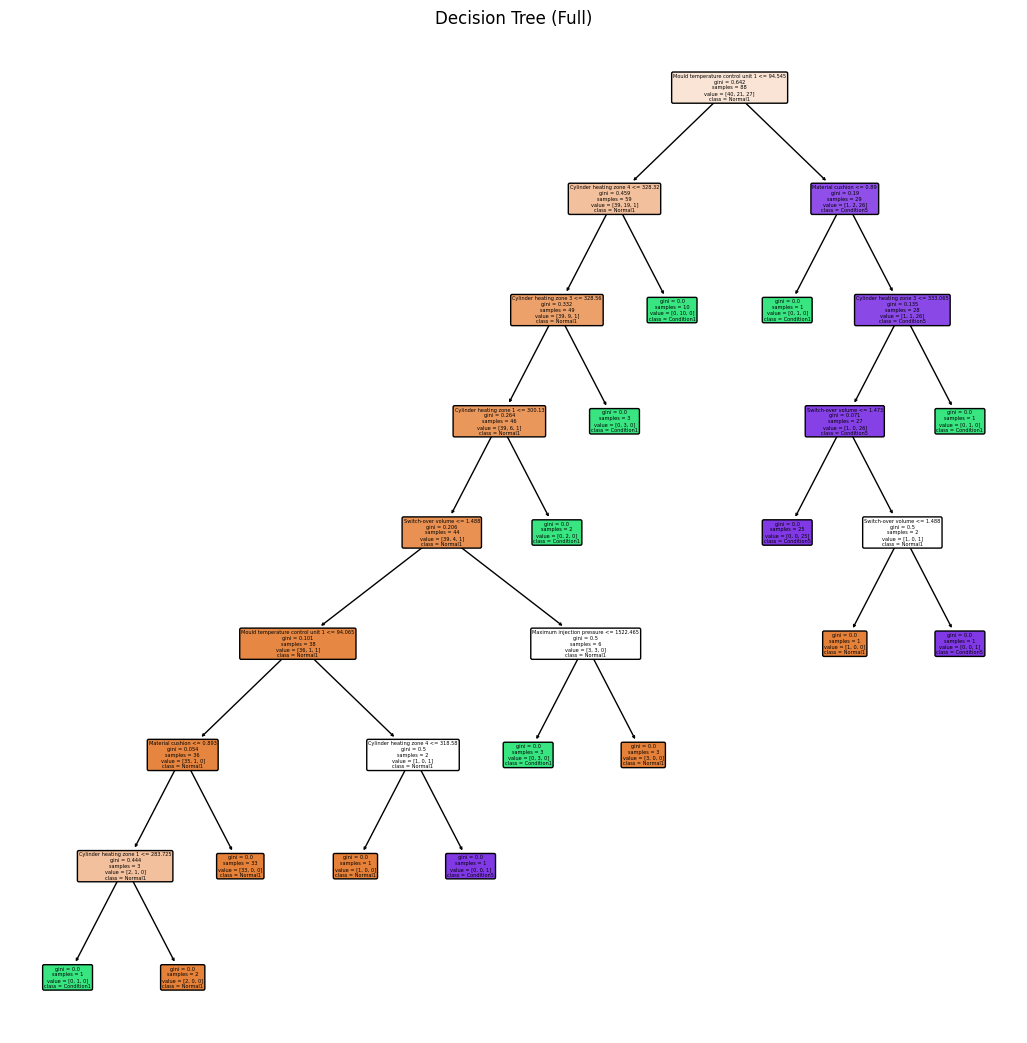

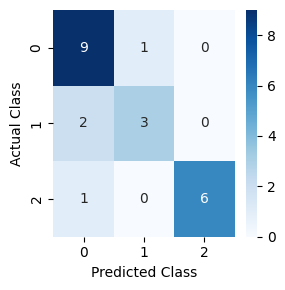


 Iteration No. 5
Training data length: 88
Verification data length: 22
Max Depth is 8
Confusion Matrix:
 [[8 2 0]
 [1 3 1]
 [1 0 6]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Overall Accuracy: 0.77 

Decision tree Prediction Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.60      0.60      0.60         5
           2       0.86      0.86      0.86         7

    accuracy                           0.77        22
   macro avg       0.75      0.75      0.75        22
weighted avg       0.77      0.77      0.77        22



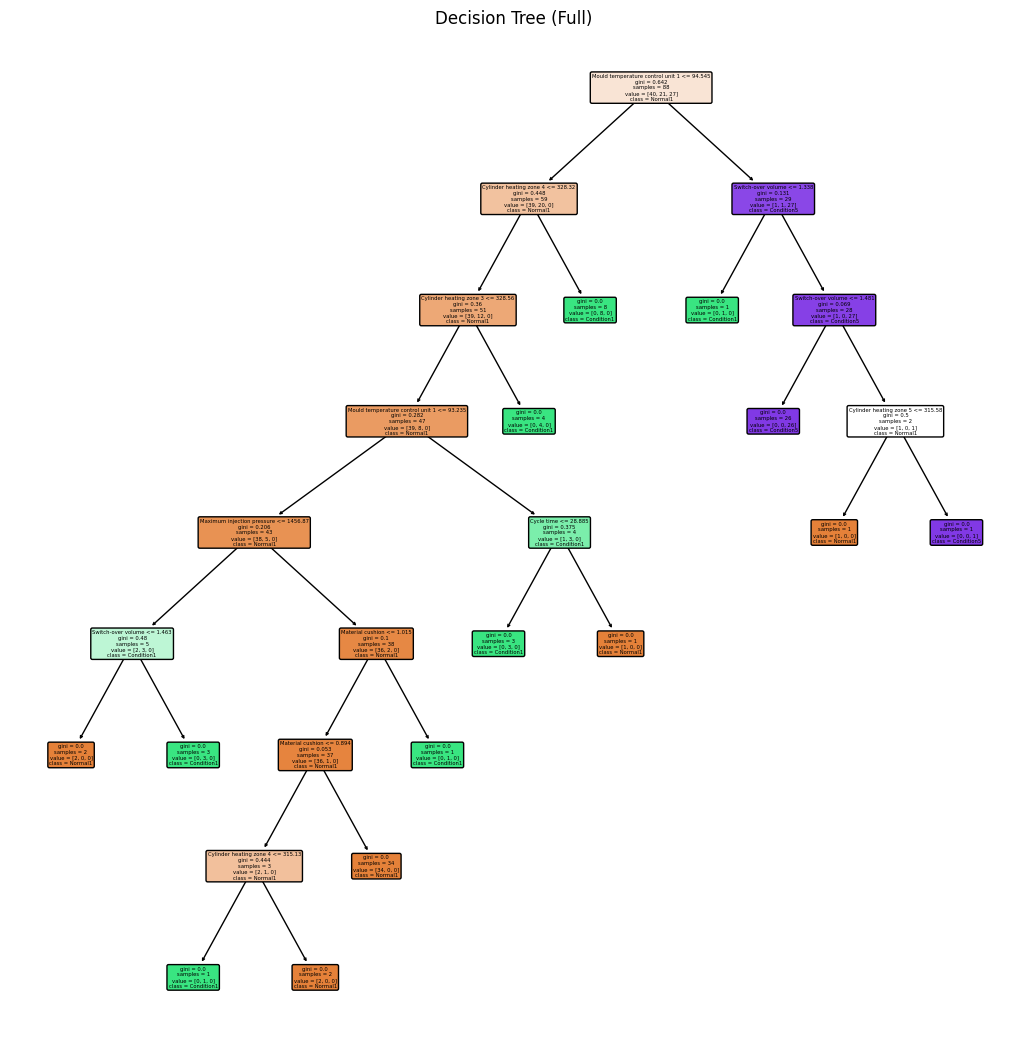

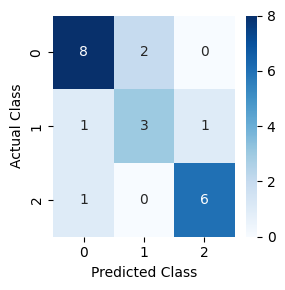

In [5]:
u = 1
alt_path = savePath + 'decision_tree'
tree4 = alt_path + '/original_tree'
max_depths = list()

for tr_i, te_i in cv.split(X,y):
    X_tr = X.iloc[tr_i] 
    X_v = X.iloc[te_i] 
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    print("\n Iteration No.",u)
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    u = u + 1

    #fit decision tree model and predict y_p
    model2.fit(X_tr, y_tr)
    y_p = model2.predict(X_v)
    

    #get depth of each decision tree
    get_depth = model2.get_depth()
    max_depths.append(get_depth)
    print('Max Depth is', get_depth)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,y_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)
   
    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])

    #calculate overall accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Overall Accuracy:", accuracy.round(2),"\n")
    accuracy_l.append(accuracy)

    print("Decision tree Prediction Classification Report", "\n", classification_report(y_v,y_p))

    # plot and save Decision tree 
    fig = plt.figure(figsize=(13, 13))

    # plot tree
    tree.plot_tree(model2, feature_names=dataframe.iloc[:,1:].keys().to_numpy(),  class_names=['Normal1','Condition1','Condition5'], filled=True,rounded=True)
    plt.title('Decision Tree (Full)')
    plt.savefig(tree4 + '/' + 'injection_moulding_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class',ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(tree4 + '/' + 'injection_moulding_' + str(len(accuracy_l)) + 'confusion matrix.png')
    plt.show()
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    
    result_matrix.to_csv(tree4 + '/' + 'cv_' + str(len(accuracy_l)) + '.csv', index=False)
    

In [6]:
##  Mean accuracy score for Full Decision Tree
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.79


## Pre-Pruning (Finding Optimal Max Depth)

In [7]:
#define decision model
model_name = 'Injection Moulding'
model7 = dt(random_state=0)
pre4 = alt_path + '/pre-pruning'

In [8]:
#split data into 4/5 for training and 1/5 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
accuracy_2=[]


 Iteration No. 1
Training data length: 88
Verification data length: 22
Best Max Depth = 5
Confusion Matrix:
 [[8 1 1]
 [2 3 1]
 [0 0 6]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.5
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy for Pre-Pruned: 0.77 

Decision Tree Prediction Classification Report,
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.75      0.50      0.60         6
           2       0.75      1.00      0.86         6

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.75        22
weighted avg       0.77      0.77      0.76        22



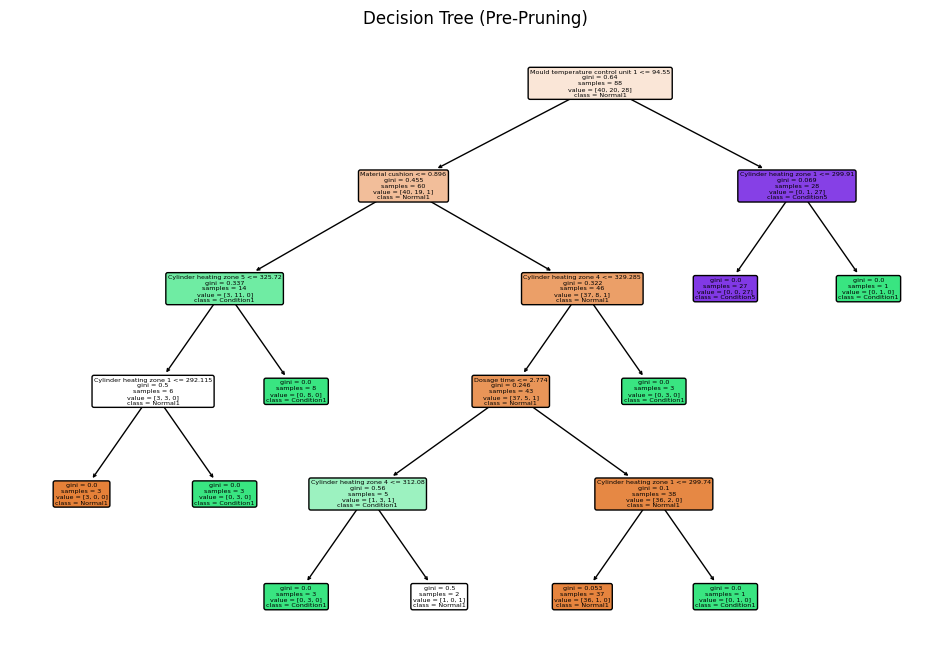

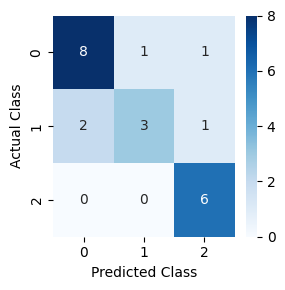


 Iteration No. 2
Training data length: 88
Verification data length: 22
Best Max Depth = 4
Confusion Matrix:
 [[8 2 0]
 [4 1 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.2
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy for Pre-Pruned: 0.73 

Decision Tree Prediction Classification Report,
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.33      0.20      0.25         5
           2       1.00      1.00      1.00         7

    accuracy                           0.73        22
   macro avg       0.67      0.67      0.66        22
weighted avg       0.70      0.73      0.71        22



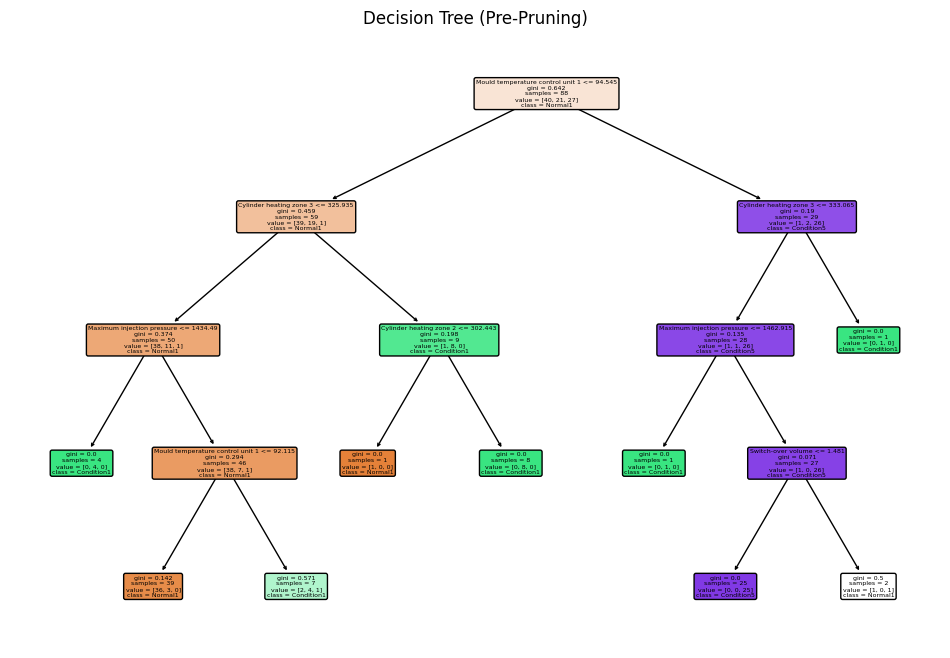

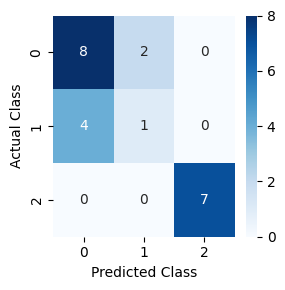


 Iteration No. 3
Training data length: 88
Verification data length: 22
Best Max Depth = 2
Confusion Matrix:
 [[9 1 0]
 [4 0 1]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.0
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy for Pre-Pruned: 0.73 

Decision Tree Prediction Classification Report,
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.00      0.00      0.00         5
           2       0.88      1.00      0.93         7

    accuracy                           0.73        22
   macro avg       0.52      0.63      0.57        22
weighted avg       0.59      0.73      0.65        22



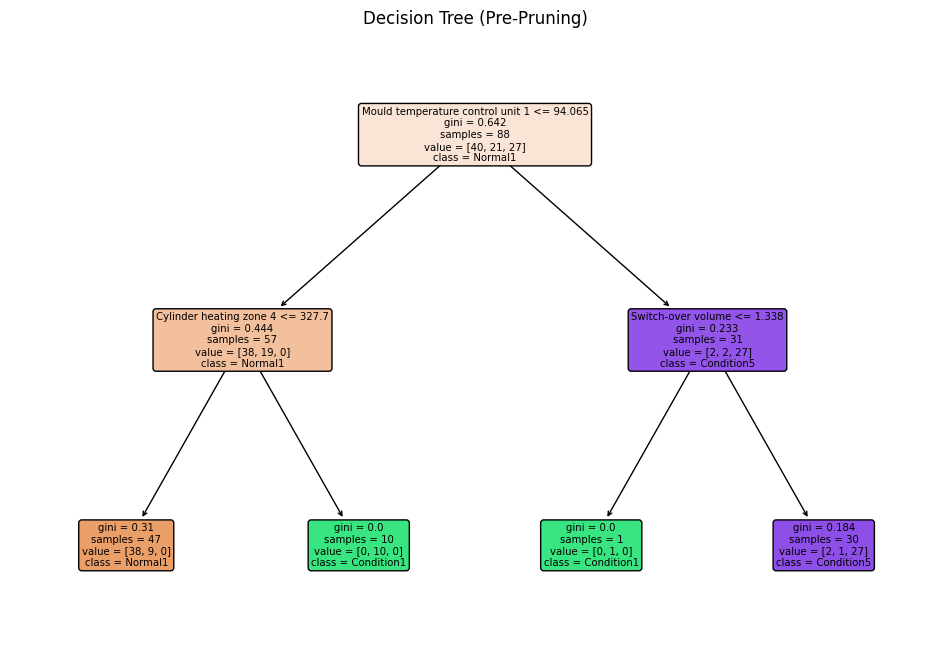

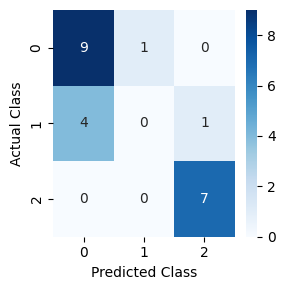


 Iteration No. 4
Training data length: 88
Verification data length: 22
Best Max Depth = 4
Confusion Matrix:
 [[10  0  0]
 [ 3  2  0]
 [ 1  0  6]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.4
Machine Quality Accuracy for Condition5: 0.86
Overall Accuracy for Pre-Pruned: 0.82 

Decision Tree Prediction Classification Report,
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.40      0.57         5
           2       1.00      0.86      0.92         7

    accuracy                           0.82        22
   macro avg       0.90      0.75      0.78        22
weighted avg       0.87      0.82      0.80        22



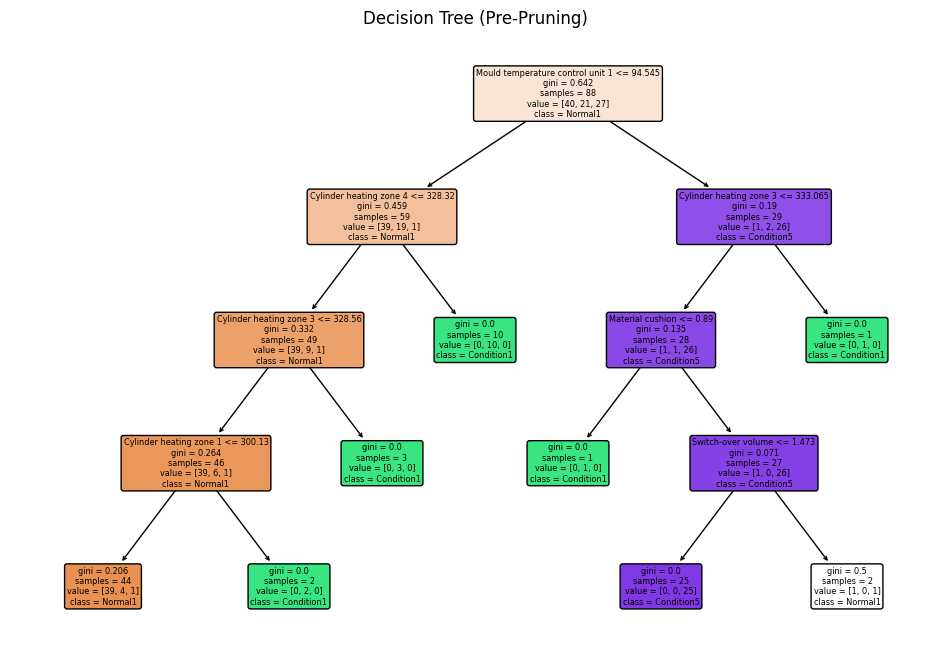

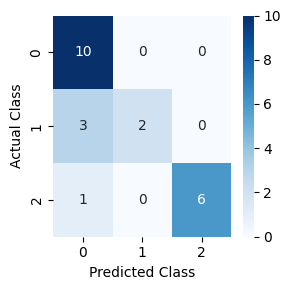


 Iteration No. 5
Training data length: 88
Verification data length: 22
Best Max Depth = 4
Confusion Matrix:
 [[9 1 0]
 [1 3 1]
 [0 1 6]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Overall Accuracy for Pre-Pruned: 0.82 

Decision Tree Prediction Classification Report,
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.60      0.60      0.60         5
           2       0.86      0.86      0.86         7

    accuracy                           0.82        22
   macro avg       0.79      0.79      0.79        22
weighted avg       0.82      0.82      0.82        22



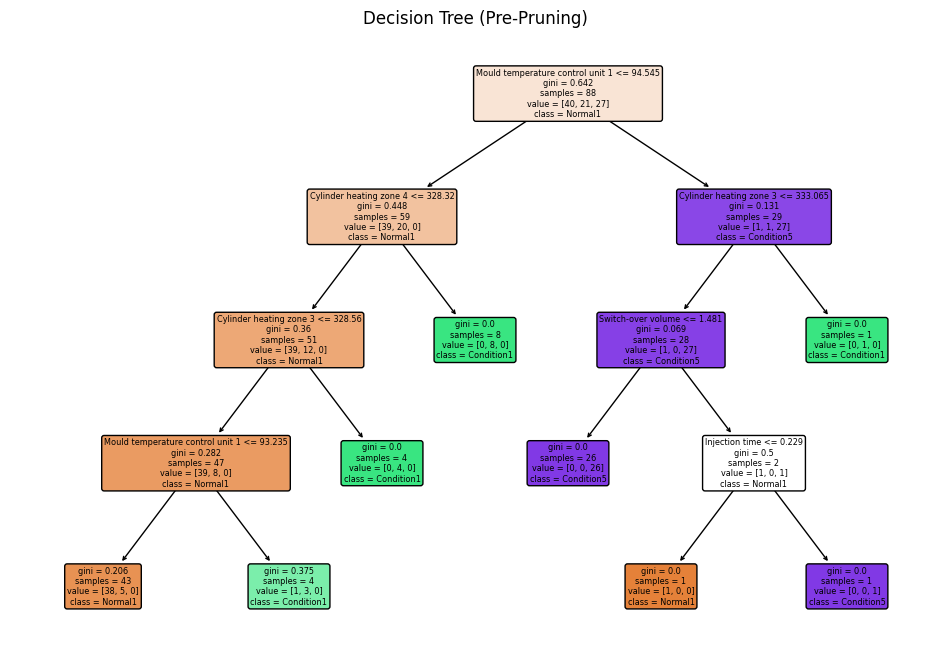

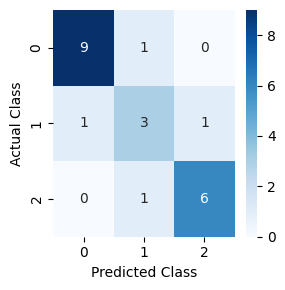

In [9]:
X = pd.DataFrame(dataframe.iloc[:,1:])
y= pd.DataFrame(dataframe.iloc[:,0])
u = 1

for tr_i, te_i in cv.split(X, y):
    x_tr = X.iloc[tr_i]
    x_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    print("\n Iteration No.",u)
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    u = u + 1

    #fit decision tree model and predict y_p
    model7.fit(x_tr, y_tr)
    y_p = model7.predict(x_v)
    
    #using GridSearchCV to find best max depth
    max_depth = model7.get_depth()
    max_depth_grid_search = GridSearchCV(estimator=dt(random_state=0), scoring=make_scorer(acs), cv =5, param_grid=ParameterGrid({"max_depth":[[max_depth] for max_depth in range (1, max_depth +1)]}),)
    
    #fit decision tree and predict newy_p
    max_depth_grid_search.fit(x_tr,y_tr)
    newy_p = max_depth_grid_search.predict(x_v)
    max_depth_grid_search.best_params_
    max_depth_grid_tree = max_depth_grid_search.best_estimator_
    best_max_depth = max_depth_grid_tree.get_depth()

    print('Best Max Depth =',best_max_depth)

    matrix = confusion_matrix(y_v,newy_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)

    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])

    #calculate overall accuracy 
    accuracy = np.mean(acs(y_v,newy_p))
    print("Overall Accuracy for Pre-Pruned:",accuracy.round(2),"\n")
    accuracy_2.append(accuracy)

    print('Decision Tree Prediction Classification Report,' '\n', classification_report(y_v,newy_p))
    
    # plot and save pre-prune tree
    plt.figure(figsize=(12,8))
    tree.plot_tree(max_depth_grid_tree, feature_names=dataframe.iloc[:,1:].keys().to_numpy(), class_names=['Normal1','Condition1','Condition5'], filled=True, rounded=True)
    plt.title('Decision Tree (Pre-Pruning)')
    plt.savefig(pre4 + '/' + 'injection_moulding_' + str(len(accuracy_2)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_v and newy_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class', ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(pre4 + '/' + 'injection_moulding_' + str(len(accuracy_2)) + 'confusion_matrix.png')
    plt.show()
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    x_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    
    result_matrix = pd.concat([x_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = newy_p 
    result_matrix.to_csv(pre4 + '/' + 'cv_' + str(len(accuracy_2)) + '.csv', index=False)

In [10]:
##  Mean accuracy score for Pre-Pruning Decision Tree
m_sc = round(np.mean(accuracy_2), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.77


## Post-Pruning (Cost-Complexity)

In [11]:
#define decision model
model_name = 'Injection Moulding'
clf = dt(random_state=0)
post4 = alt_path + '/post-pruning'

In [12]:
#split data into 4/5 for training and 1/5 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
accuracy_3 =[]


 Iteration No. 1
Training data length: 88
Verification data length: 22
ccp alpha wil give list of values : [0.         0.01105651 0.01136364 0.02045455 0.02094918 0.02191558
 0.02678571 0.04509848 0.0484994  0.08817758 0.30835301] 

Impurities in Decision Tree : [0.         0.02211302 0.03347666 0.0539312  0.07488038 0.09679597
 0.1503674  0.19546587 0.24396527 0.33214286 0.64049587] 

Last node in Decision tree is 25 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 21 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 19 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 17 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 15 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 13 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 9 and ccp_alpha for last node is 0.3083530106257379
Last node in Decision tree is 

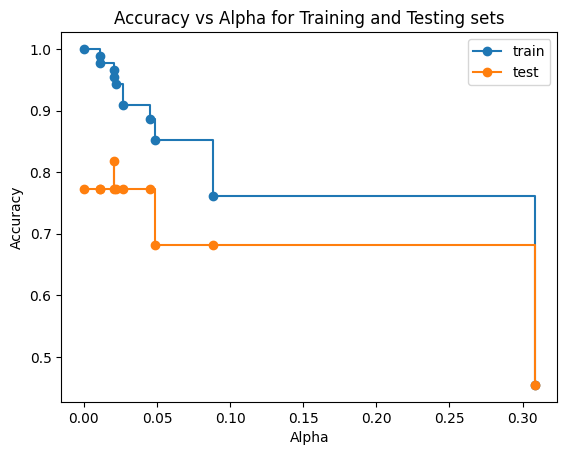

Max Depth of Tree: 7
Confusion Matrix:
 [[8 1 1]
 [2 3 1]
 [0 0 6]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.5
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy of Post-Pruned Tree: 0.77 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.75      0.50      0.60         6
           2       0.75      1.00      0.86         6

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.75        22
weighted avg       0.77      0.77      0.76        22



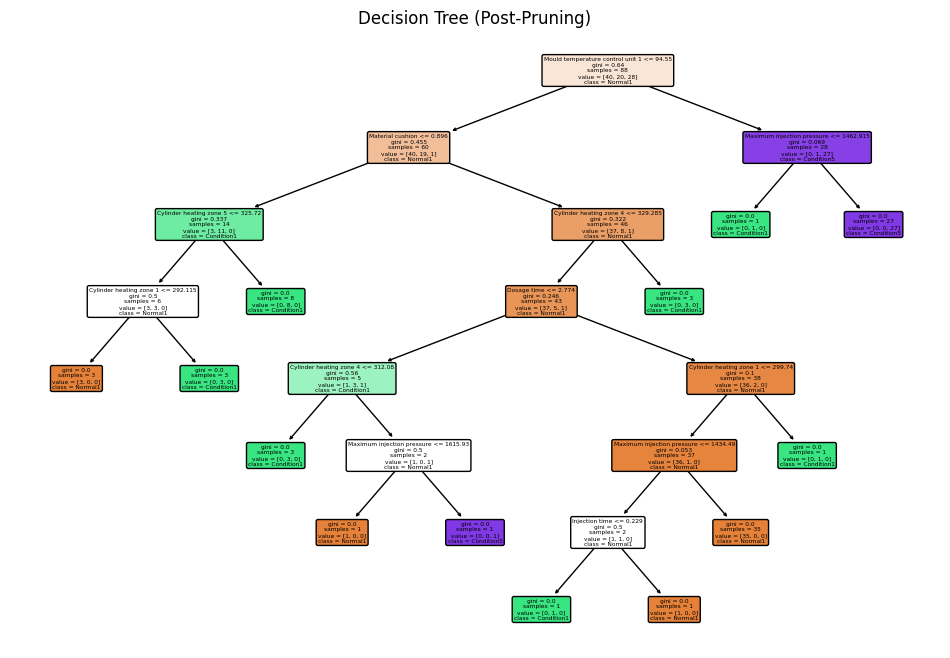

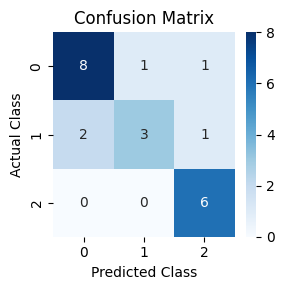


 Iteration No. 2
Training data length: 88
Verification data length: 22
ccp alpha wil give list of values : [0.         0.01094276 0.01515152 0.02020202 0.0204052  0.02211302
 0.03030303 0.04082404 0.04526452 0.0586166  0.07530645 0.27182659] 

Impurities in Decision Tree : [0.         0.02188552 0.03703704 0.05723906 0.09804946 0.12016248
 0.15046551 0.19128955 0.23655407 0.29517067 0.37047713 0.64230372] 

Last node in Decision tree is 27 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 23 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 21 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 19 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 15 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 13 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 11 and ccp_alpha for last node is 0.2718265923943757
Last no

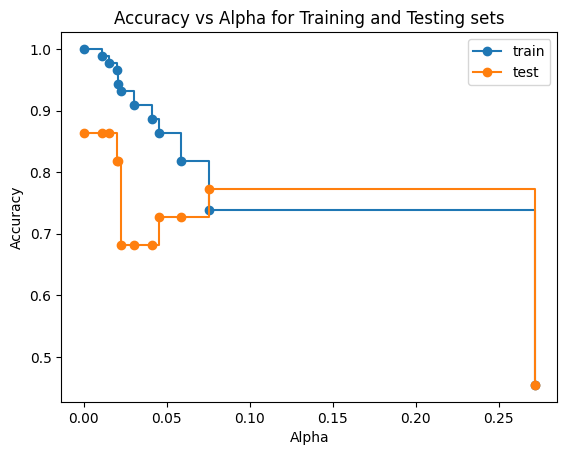

Max Depth of Tree: 5
Confusion Matrix:
 [[7 3 0]
 [4 1 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.7
Machine Quality Accuracy for Condition1: 0.2
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy of Post-Pruned Tree: 0.68 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.25      0.20      0.22         5
           2       1.00      1.00      1.00         7

    accuracy                           0.68        22
   macro avg       0.63      0.63      0.63        22
weighted avg       0.66      0.68      0.67        22



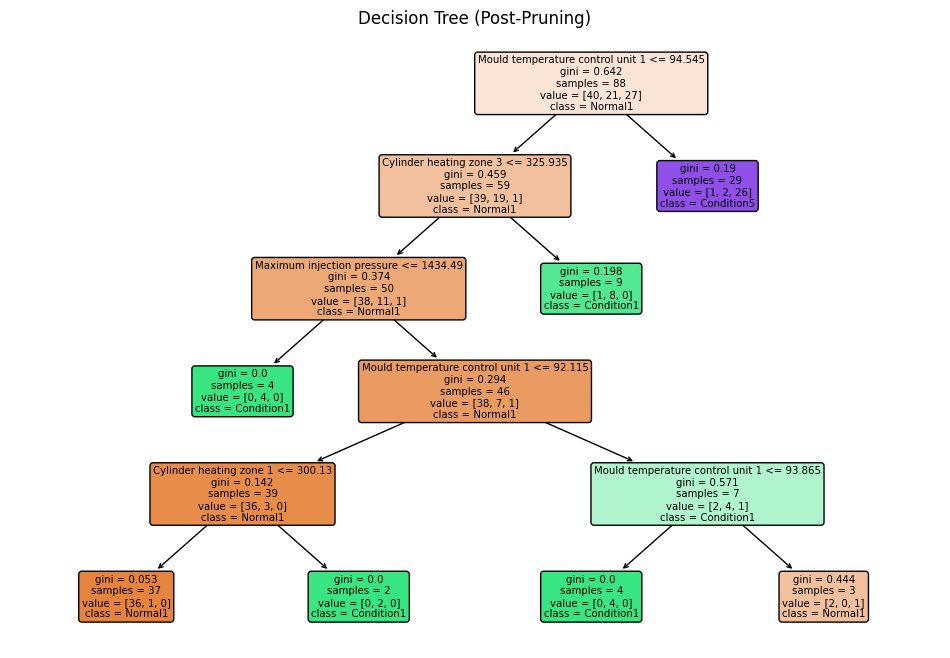

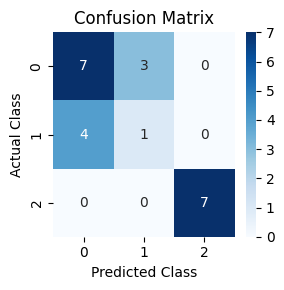


 Iteration No. 3
Training data length: 88
Verification data length: 22
ccp alpha wil give list of values : [0.         0.01095779 0.01105651 0.02006528 0.02727273 0.03286533
 0.03551751 0.04760858 0.12250161 0.27231349] 

Impurities in Decision Tree : [0.         0.02191558 0.04402861 0.10422446 0.13149719 0.16436252
 0.19988003 0.24748861 0.36999022 0.64230372] 

Last node in Decision tree is 27 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 23 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 19 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 13 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 11 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 9 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 7 and ccp_alpha for last node is 0.27231349417932993
Last node in Decision tree is 5 and ccp_alpha 

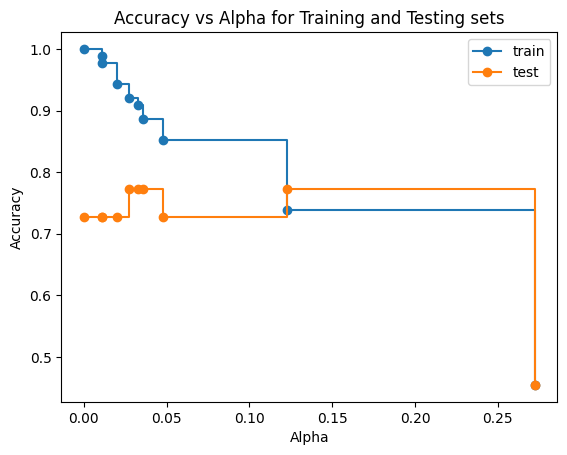

Max Depth of Tree: 5
Confusion Matrix:
 [[8 2 0]
 [2 2 1]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.4
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy of Post-Pruned Tree: 0.77 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.50      0.40      0.44         5
           2       0.88      1.00      0.93         7

    accuracy                           0.77        22
   macro avg       0.72      0.73      0.73        22
weighted avg       0.76      0.77      0.76        22



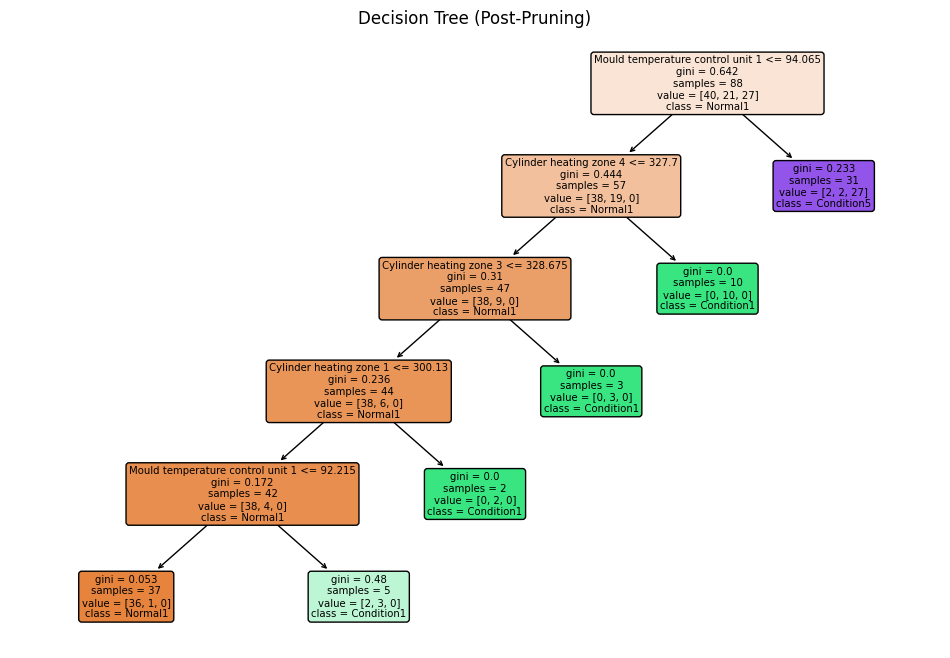

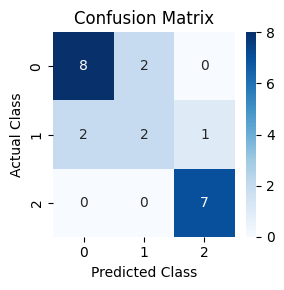


 Iteration No. 4
Training data length: 88
Verification data length: 22
ccp alpha wil give list of values : [0.         0.01091507 0.01094276 0.0204052  0.02956448 0.03505659
 0.04721909 0.12271627 0.27182659] 

Impurities in Decision Tree : [0.         0.04366029 0.06554581 0.10635621 0.16548518 0.20054177
 0.24776086 0.37047713 0.64230372] 

Last node in Decision tree is 29 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 21 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 17 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 13 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 9 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 7 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 5 and ccp_alpha for last node is 0.2718265923943757
Last node in Decision tree is 3 and ccp_alpha for last node is 0.27182659239

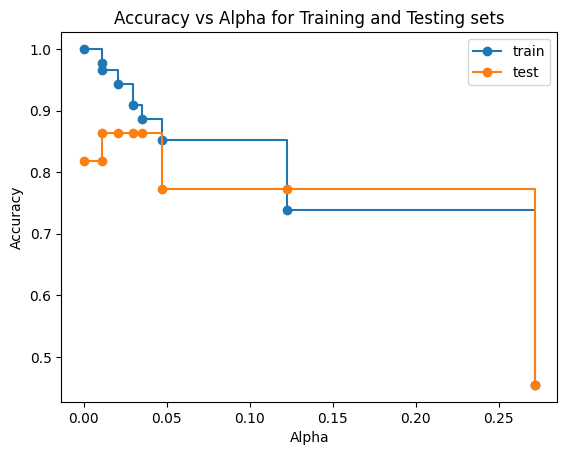

Max Depth of Tree: 4
Confusion Matrix:
 [[10  0  0]
 [ 3  2  0]
 [ 0  0  7]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.4
Machine Quality Accuracy for Condition5: 1.0
Overall Accuracy of Post-Pruned Tree: 0.86 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         7

    accuracy                           0.86        22
   macro avg       0.92      0.80      0.81        22
weighted avg       0.90      0.86      0.84        22



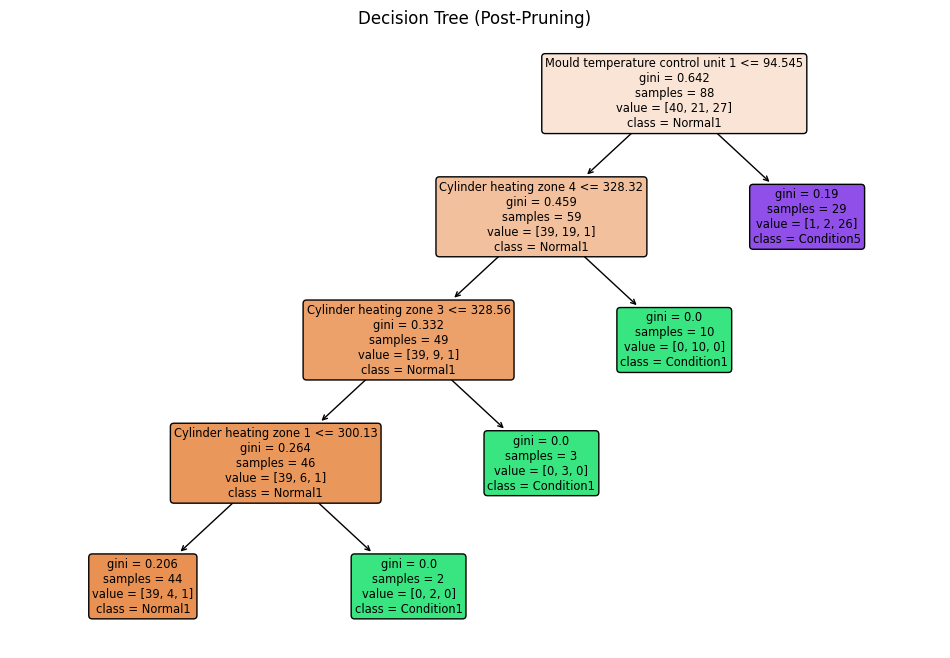

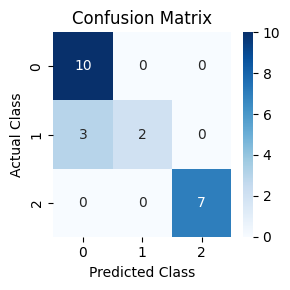


 Iteration No. 5
Training data length: 88
Verification data length: 22
ccp alpha wil give list of values : [0.         0.01095779 0.01105651 0.01704545 0.02094918 0.02118786
 0.02727273 0.0300879  0.03340212 0.05768574 0.0919061  0.29873802] 

Impurities in Decision Tree : [0.         0.02191558 0.04402861 0.06107406 0.08202324 0.1032111
 0.13048383 0.16057174 0.19397385 0.2516596  0.3435657  0.64230372] 

Last node in Decision tree is 27 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 23 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 19 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 17 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 15 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 13 and ccp_alpha for last node is 0.2987380211176104
Last node in Decision tree is 11 and ccp_alpha for last node is 0.2987380211176104
Last nod

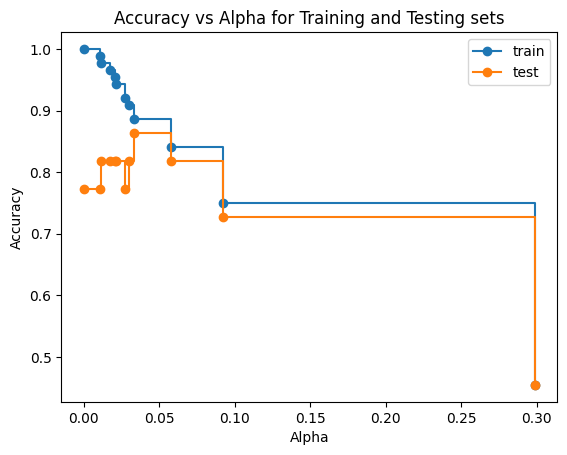

Max Depth of Tree: 5
Confusion Matrix:
 [[8 2 0]
 [1 3 1]
 [0 1 6]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Overall Accuracy of Post-Pruned Tree: 0.77 

Decision Tree Prediction Classification report 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.50      0.60      0.55         5
           2       0.86      0.86      0.86         7

    accuracy                           0.77        22
   macro avg       0.75      0.75      0.75        22
weighted avg       0.79      0.77      0.78        22



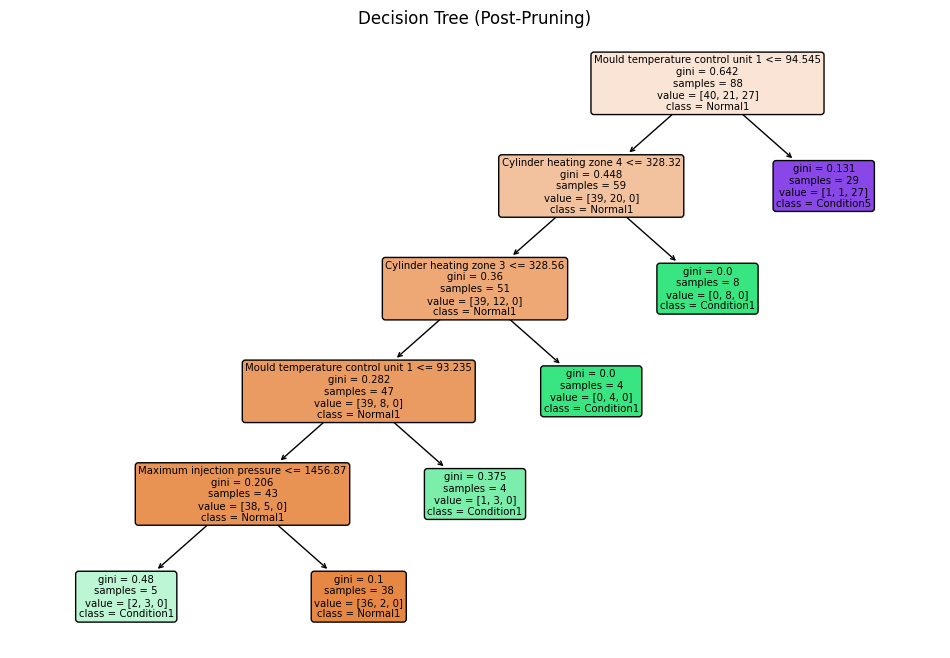

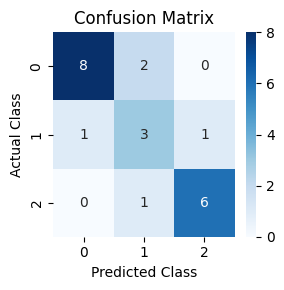

In [13]:
X = pd.DataFrame(dataframe.iloc[:,1:])
y= pd.DataFrame(dataframe.iloc[:,0])
u = 1

for tr_i, te_i in cv.split(X, y):
    x_tr = X.iloc[tr_i]
    x_v = X.iloc[te_i]
    y_tr = y.iloc[tr_i]
    y_v = y.iloc[te_i]
    
    print('\n Iteration No.',u)
    print("Training data length:", len(y_tr))
    print("Verification data length:", len(y_v))
    u = u + 1
    
    #path returns ccp_alphas and impurities at each step of the pruning
    path=clf.cost_complexity_pruning_path(x_tr,y_tr)
    ccp_alphas = path.ccp_alphas
    impurities = path.impurities
    print("ccp alpha wil give list of values :",ccp_alphas,"\n")
    print("Impurities in Decision Tree :",impurities,"\n")
    
    #clfs is for storing all modes here 
    #checking 3 nodes at a time for 1 decision tree
    clfs=[]   
    for ccp_alpha in ccp_alphas:
        clf=dt(random_state=0,ccp_alpha=ccp_alpha)
        clf.fit(x_tr,y_tr)
        clfs.append(clf)

        print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

    #plotting the graph to see accuracy against alphas for testing and training
    train_scores = [clf.score(x_tr, y_tr) for clf in clfs]
    test_scores = [clf.score(x_v, y_v) for clf in clfs]
    fig, ax = plt.subplots()
    ax.set_xlabel("Alpha")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy vs Alpha for Training and Testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
    ax.legend()
    plt.show()

    #finding the best ccp_alpha with GridSearchCV
    ccp_alpha_grid_search = GridSearchCV(estimator=dt(random_state=0), cv=5, scoring=make_scorer(acs), param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),)
    ccp_alpha_grid_search.fit(x_tr,y_tr)
    ccp_alpha_grid_search.best_params_
    best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
    
    #fit post-prune decision tree model and predict newy_p2
    newy_p2 = best_ccp_alpha_tree.predict(x_v)
    
    #print the depth of tree
    get_depth = best_ccp_alpha_tree.get_depth()
    print('Max Depth of Tree:',get_depth)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,newy_p2)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)

    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])

    #calculate overall accuracy
    accuracy = np.mean(acs(y_v, newy_p2))
    print("Overall Accuracy of Post-Pruned Tree:", accuracy.round(2),"\n")
    accuracy_3.append(accuracy)

    print("Decision Tree Prediction Classification report", "\n", classification_report(y_v,newy_p2))

    #plot and save post-prune decision tree
    plt.figure(figsize=(12,8))
    tree.plot_tree(best_ccp_alpha_tree, feature_names=dataframe.iloc[:,1:].keys().to_numpy(),  class_names=['Normal1','Condition1','Condition5'], filled=True, rounded=True)
    plt.title('Decision Tree (Post-Pruning)')
    plt.savefig(post4 + '/' + 'injection_moulding_' + str(len(accuracy_3)) + 'decision_tree.png')

    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))

    #use heatmap
    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class',ylabel='Actual Class')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(post4 + '/' + 'injection_moulding' + str(len(accuracy_3)) + 'confusion matrix.png')
    plt.show()

    #reset the label to original and save the original test data +prediction into a .csv file 
    x_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)

    result_matrix = pd.concat([x_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = newy_p2
    result_matrix.to_csv(post4 + '/' + 'cv_' + str(len(accuracy_3)) + '.csv', index=False)

In [14]:
##  Mean accuracy score for Post-Pruned Tree
model_name = 'Injection Moulding'
m_sc = round(np.mean(accuracy_3), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.77
